# Model Training 
This file trains and tests different models based on the data produced and cleaned in the analysis file

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# PCA visualization
from sklearn.decomposition import PCA

In [99]:
df = pd.read_csv('../data/cleaned_train.csv')
df_without_family = df.drop(['FamilySize', 'Sex', 'AgeGroup_Binary'], axis=1)

In [100]:
df_without_family.head()

,Pclass,Survived,SexEncoded,AgeGroupEncoded
0,3,0,1,1
1,1,1,0,1
2,3,1,0,1
3,1,1,0,1
4,3,0,1,1


In [102]:
X = df_without_family[['Pclass', 'SexEncoded', 'AgeGroupEncoded']]
y = df_without_family['Survived']

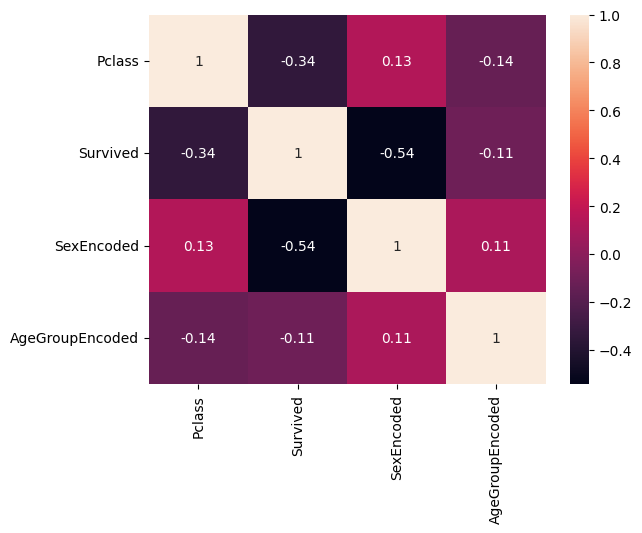

In [103]:
# correlation matrix
corr = df_without_family.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 712
Test size: 179


In [87]:
# Training the models
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {model.score(X_test, y_test)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
    return model

In [88]:
def plot_pca(model, X, y):
    # Perform PCA with 2 components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Create a DataFrame for PCA results
    X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    X_pca_df['label'] = y.values  # Add labels to the DataFrame
    
    # Plot the PCA components
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='label', palette='viridis', alpha=0.8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Label')
    plt.show()

    print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
    print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_)}")


In [105]:
logreg_model = train_model(
    LogisticRegression(), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Accuracy: 0.7877094972067039
Confusion Matrix: 
[[88 17]
 [21 53]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

ROC AUC Score: 0.7771557271557272


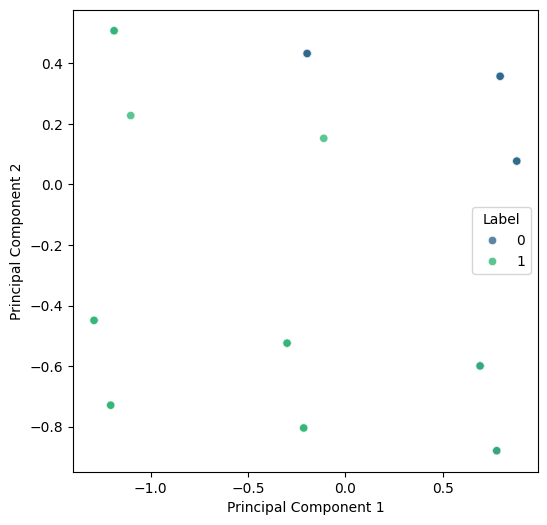

Explained Variance Ratio: [0.68007412 0.20975891]
Total Explained Variance: 0.8898330361560327


In [106]:
plot_pca(logreg_model, X_test, y_test)

In [107]:
decision_tree_model = train_model(
    DecisionTreeClassifier(max_depth=4), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Accuracy: 0.776536312849162
Confusion Matrix: 
[[101   4]
 [ 36  38]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       105
           1       0.90      0.51      0.66        74

    accuracy                           0.78       179
   macro avg       0.82      0.74      0.74       179
weighted avg       0.81      0.78      0.76       179

ROC AUC Score: 0.7377091377091377


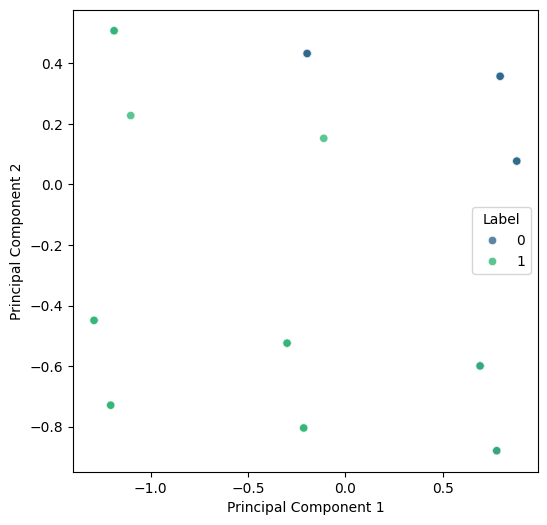

Explained Variance Ratio: [0.68007412 0.20975891]
Total Explained Variance: 0.8898330361560327


In [108]:
plot_pca(decision_tree_model, X_test, y_test)

In [109]:
random_forest_model = train_model(
    RandomForestClassifier(n_estimators=100), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Accuracy: 0.776536312849162
Confusion Matrix: 
[[101   4]
 [ 36  38]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       105
           1       0.90      0.51      0.66        74

    accuracy                           0.78       179
   macro avg       0.82      0.74      0.74       179
weighted avg       0.81      0.78      0.76       179

ROC AUC Score: 0.7377091377091377


In [110]:
xgboost_model = train_model(
    XGBClassifier(n_estimators=100), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Accuracy: 0.776536312849162
Confusion Matrix: 
[[101   4]
 [ 36  38]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       105
           1       0.90      0.51      0.66        74

    accuracy                           0.78       179
   macro avg       0.82      0.74      0.74       179
weighted avg       0.81      0.78      0.76       179

ROC AUC Score: 0.7377091377091377


In [113]:
svm_model = train_model(
    SVC(kernel="rbf", probability=True), 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

Accuracy: 0.776536312849162
Confusion Matrix: 
[[101   4]
 [ 36  38]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       105
           1       0.90      0.51      0.66        74

    accuracy                           0.78       179
   macro avg       0.82      0.74      0.74       179
weighted avg       0.81      0.78      0.76       179

ROC AUC Score: 0.7377091377091377
